In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = "./data/D1/tg_raw.csv"
TEST_DATA_PATH = "./DATA/Polymer Tg SMILES.xlsx"


data = pd.read_csv(DATA_PATH)
data

,SMILES,tg
0,*C*,-54.0
1,*CC(*)C,-3.0
2,*CC(*)CC,-24.1
3,*CC(*)CCC,-37.0
4,*CC(*)C(C)C,60.0
...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0


In [2]:
test_data = pd.read_excel(TEST_DATA_PATH)
test_data

,No,Polymer ID,Nama Polimer,SMILES,Tg
0,1,P010001,polyethylene,*C*,-120
1,2,P010002,polypropylene,*CC(C)*,0
2,3,P010003,polybutene,*CC(CC)*,-24
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30
...,...,...,...,...,...
1435,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75
1436,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63
1437,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6
1438,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53


In [3]:
test_data = test_data[test_data["Tg"] != "9,000,00"].copy()
test_data["Tg"] = test_data["Tg"].astype(float)
test_data.reset_index(drop=True, inplace=True)

In [4]:
data["tg"].describe()

count    7174.000000
mean      141.948090
std       112.178143
min      -139.000000
25%        55.000000
50%       134.000000
75%       231.000000
max       495.000000
Name: tg, dtype: float64

In [5]:
data["SMILES"].apply(lambda x: len(x)).describe()

count    7174.000000
mean       63.467103
std        35.174694
min         3.000000
25%        35.000000
50%        59.000000
75%        85.000000
max       314.000000
Name: SMILES, dtype: float64

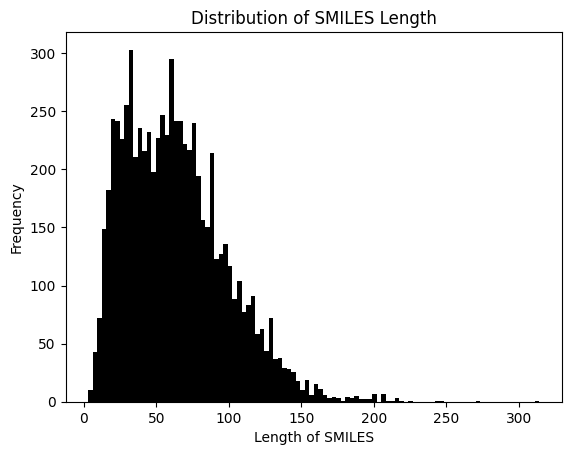

In [6]:
smiles_length = data["SMILES"].apply(lambda x: len(x))
smiles_length.hist(bins=100, color="#000")
plt.xlabel("Length of SMILES")
plt.ylabel("Frequency")
plt.title("Distribution of SMILES Length")
plt.grid(alpha=0)
plt.show()

In [7]:
data["SMILES"]

0                                                 *C*
1                                             *CC(*)C
2                                            *CC(*)CC
3                                           *CC(*)CCC
4                                         *CC(*)C(C)C
                            ...                      
7169                               *CC(*)(F)C(=O)OCCC
7170          *CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F
7171    *CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*
7172     *CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*
7173                      *CC(*)(F)C(=O)OCC(Cl)(Cl)Cl
Name: SMILES, Length: 7174, dtype: object

In [8]:
from collections import Counter


unique_chars = set()
for smiles in data["SMILES"]:
    unique_chars.update(set(smiles))

unique_chars = sorted(list(unique_chars))
print(f"There are {len(unique_chars)} unique characters in SMILES")


all_chars = "".join(data["SMILES"].dropna())
char_counts = Counter(all_chars)

# Convert to DataFrame for better visualization
char_counts_df = pd.DataFrame(char_counts.items(), columns=["Character", "Count"])
char_counts_df = char_counts_df.sort_values(by="Count", ascending=True)
char_counts_df.head()

There are 47 unique characters in SMILES


,Character,Count
46,K,1
41,L,1
45,T,1
42,d,2
44,Z,2


In [9]:
import numpy as np

# Extract unique characters
unique_chars = sorted(set("".join(data["SMILES"].astype(str))))
char_to_index = {char: i for i, char in enumerate(unique_chars)}

# Define max length for padding
max_length = 200


# Function to convert SMILES to One-Hot Encoding
def smiles_to_ohe(smiles, char_to_index, max_length):
    ohe_matrix = np.zeros((max_length, len(char_to_index)), dtype=int)
    for i, char in enumerate(smiles[:max_length]):  # Truncate if longer than max_length
        if char in char_to_index:
            ohe_matrix[i, char_to_index[char]] = 1
    return ohe_matrix.flatten()  # Flatten to create a single-row feature vector


# Apply the transformation
data["OHE_Features"] = data["SMILES"].apply(
    lambda x: smiles_to_ohe(x, char_to_index, max_length).tolist()
)

# Convert into a DataFrame with separate columns
ohe_df = pd.DataFrame(
    data["OHE_Features"].to_list(),
    columns=[f"Char_{i}" for i in range(max_length * len(unique_chars))],
)

In [10]:
test_data["OHE_Features"] = (
    test_data["SMILES"]
    .apply(lambda x: smiles_to_ohe(x, char_to_index, max_length).tolist())
    .to_list()
)

ohe_df_test = pd.DataFrame(
    test_data["OHE_Features"].to_list(),
    columns=[f"Char_{i}" for i in range(max_length * len(unique_chars))],
)

In [11]:
ohe_df

,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,Char_7,Char_8,Char_9,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7171,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
processed_data = pd.concat([data, ohe_df], axis=1)
processed_data

,SMILES,tg,OHE_Features,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,*C*,-54.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,*CC(*)C,-3.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,*CC(*)CC,-24.1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,*CC(*)CCC,-37.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,*CC(*)C(C)C,60.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
processed_data = processed_data.dropna(subset=["tg"])
processed_data.reset_index(drop=True, inplace=True)
processed_data

,SMILES,tg,OHE_Features,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,*C*,-54.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,*CC(*)C,-3.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,*CC(*)CC,-24.1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,*CC(*)CCC,-37.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,*CC(*)C(C)C,60.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
processed_data_test = pd.concat([test_data, ohe_df], axis=1)
processed_data_test = processed_data_test.dropna(subset=["Tg"])
processed_data_test.reset_index(drop=True, inplace=True)

In [38]:
processed_data[["SMILES", "tg"]][30:40]

,SMILES,tg
30,*/C=C/CCC*,-105.0
31,*/C=C/CC*,-91.0
32,*CCC(C)C(*)C,-26.0
33,*CC(*)CCCCCCCCCCCCCC,-24.0
34,*/C=C/CCCCCC*,-78.0
35,*CC(*)C1CCCC(C)C1,141.0
36,*CC(*)C1CCC(C)CC1,132.0
37,*CC/C=C(/*)CCCCCCC,-83.0
38,*CC/C=C(/*)C(C)C,-47.0
39,*/C=C/C1CCC(*)C1,31.0


In [34]:
processed_data[["SMILES", "tg"]][processed_data[["SMILES", "tg"]]["tg"].isin([-120]) ]

,SMILES,tg
2046,*O[Si](*)(C)CCC,-120.0


In [36]:
processed_data_test[["SMILES", "Tg"]][processed_data_test[["SMILES", "Tg"]]["Tg"].isin([-120]) ]

,SMILES,Tg
0,*C*,-120.0
1399,*O[Si](CCCCCCCCCCCOc1ccc(cc1)/C=C/c1ccc(cc1)C#...,-120.0


In [37]:
processed_data_test[["SMILES", "Tg"]][30:40]

,SMILES,Tg
30,*CC(c1cccc(c1)Cl)*,90.0
31,*CC(c1cccc(c1)F)*,86.0
32,*CC(c1ccc(cc1)C)*,101.0
33,*CC(c1ccc(cc1)C(C)(C)C)*,141.0
34,*CC(c1ccc(cc1)Cl)*,299.0
35,*CC(c1ccc(cc1)F)*,94.0
36,CCCOS(=O)(=O)c1ccc(cc1)C(C*)*,217.0
37,*CC(c1ccc(cc1C)C)*,95.0
38,*CC(c1cc(C)cc(c1)C)*,104.0
39,*CC(c1ccc(c(c1)C)C)*,107.0


In [40]:
processed_data_test[["SMILES", "Tg"]][processed_data_test[["SMILES", "Tg"]]["SMILES"] == "*CC(*)C1CCCC(C)C1"]

,SMILES,Tg


In [42]:
smiles_train = processed_data["SMILES"].to_list()
smiles_test = processed_data_test["SMILES"].to_list()

overlapping_smiles = set(smiles_train).intersection(set(smiles_test))
len(overlapping_smiles)

144

In [43]:
# Filter the processed_data and processed_data_test DataFrames to include only the overlapping SMILES
overlapping_data_train = processed_data[
    processed_data["SMILES"].isin(overlapping_smiles)
]
overlapping_data_test = processed_data_test[
    processed_data_test["SMILES"].isin(overlapping_smiles)
]

# Merge the two DataFrames on the SMILES column
merged_data = pd.merge(
    overlapping_data_train[["SMILES", "tg"]],
    overlapping_data_test[["SMILES", "Tg"]],
    on="SMILES",
    suffixes=("_train", "_test"),
)

# Rename the columns
merged_data.columns = ["overlapping_smiles", "tg_train", "tg_test"]

merged_data

,overlapping_smiles,tg_train,tg_test
0,*C*,-54.0,-120.0
1,*CCO*,-56.0,-71.0
2,*CC(COc1ccccc1)O*,42.0,41.0
3,*CCCO*,-73.6,35.0
4,*CCCCCCCCO*,-13.0,-61.7
...,...,...,...
141,*CCCCCCCNC(=O)CCCCCCCCCCCCCCCCCCC(=O)N*,46.0,46.0
142,*CCCCCNC(=O)CCCCCCCCCCCCCCCCCCC(=O)N*,52.0,52.0
143,*CCCCCCCCCCCNC(=O)CCCCCCCCCCC(=O)N*,39.0,39.0
144,*CCCNC(=O)O*,26.0,25.0


In [45]:
merged_data[merged_data["tg_train"] == merged_data["tg_test"]]

,overlapping_smiles,tg_train,tg_test
68,*CCCCCCCCNC(=O)CCCCC(=O)N*,50.0,50.0
81,*CCCCCCCCCCCCCCCCCCNC(=O)CCCCCCCCCCCCCCCCC(=O)N*,50.0,50.0
98,*CCCCCCCCCOC(=O)NCCCCCCNC(=O)O*,58.0,58.0
115,*CCCNC(=O)CCCCCCCCC(=O)NCCCOCCOCCO*,40.0,40.0
116,*CCCCSS*,-55.0,-55.0
119,*CCCCOC(=O)/C=C/C(=O)O*,93.0,93.0
120,*CCCCCCCCCCOC(=O)CC/C=C/CCC(=O)O*,-15.0,-15.0
121,*CCCCCCCCCCCCCCCCOC(=O)CC/C=C/CCC(=O)O*,-18.0,-18.0
122,*CCCCCCCCCCCCCCCCOC(=O)C/C=C/CC(=O)O*,-22.0,-22.0
123,*CC(=O)NCC(=O)O*,67.0,67.0


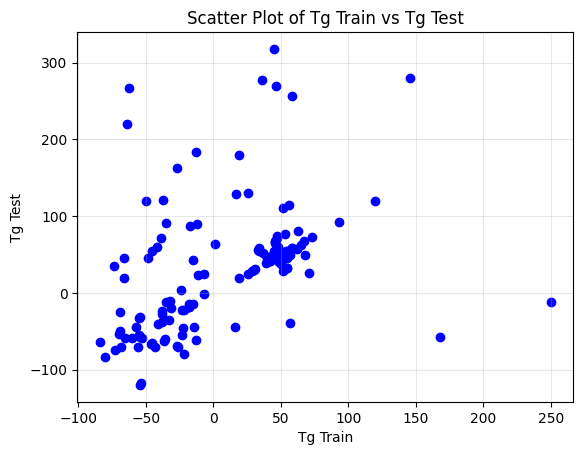

In [44]:
plt.scatter(merged_data["tg_train"], merged_data["tg_test"], color="blue")
plt.xlabel("Tg Train")
plt.ylabel("Tg Test")
plt.title("Scatter Plot of Tg Train vs Tg Test")
plt.grid(alpha=0.3)
plt.show()

GPU is not available


In [15]:
X = processed_data.drop(columns=["SMILES", "tg", "OHE_Features"])
X.head()

,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,Char_7,Char_8,Char_9,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = processed_data["tg"]
y.head()

0   -54.0
1    -3.0
2   -24.1
3   -37.0
4    60.0
Name: tg, dtype: float64

In [19]:
X_test = processed_data_test.drop(columns=["No", "Polymer ID", "Nama Polimer", "SMILES", "Tg", "OHE_Features"])
X_test.head()

,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,Char_7,Char_8,Char_9,...,Char_9390,Char_9391,Char_9392,Char_9393,Char_9394,Char_9395,Char_9396,Char_9397,Char_9398,Char_9399
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y_test = processed_data_test["Tg"]
y_test.head()

0   -120.0
1      0.0
2    -24.0
3    -40.0
4     30.0
Name: Tg, dtype: float64

In [21]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, n_jobs=-1)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

R2 Score: -0.9069505035104422
Mean Squared Error: 15033.971730835177


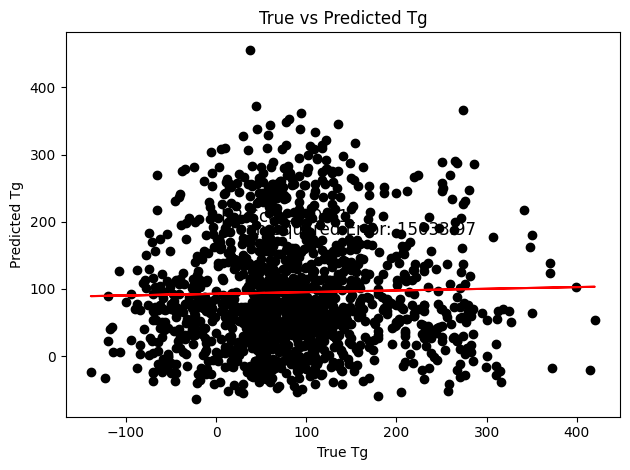

In [22]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")


plt.scatter(y_test, y_pred, color="black")
plt.xlabel("True Tg")
plt.ylabel("Predicted Tg")
plt.title("True vs Predicted Tg")

# regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red")

plt.text(5, 200, f"R2 Score: {r2:.2f}", fontsize=12)
plt.text(5, 180, f"Mean Squared Error: {mse:.2f}", fontsize=12)
plt.grid(alpha=0)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

In [22]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

R2 Score: 0.7850753763413967
Mean Squared Error: 2652.2215870033847


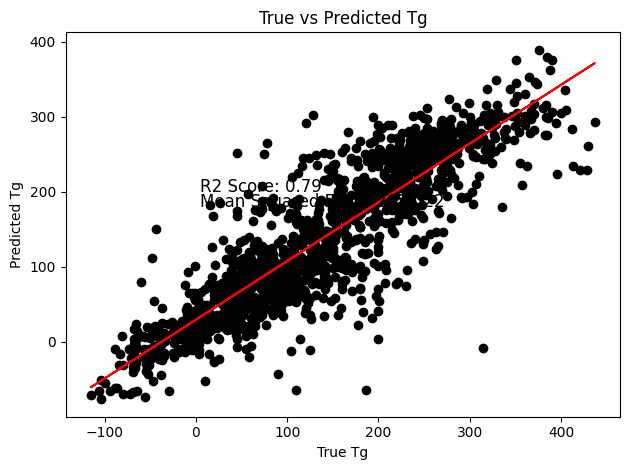

In [23]:
from sklearn.metrics import mean_squared_error, r2_score


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")


plt.scatter(y_test, y_pred, color="black")
plt.xlabel("True Tg")
plt.ylabel("Predicted Tg")
plt.title("True vs Predicted Tg")

# regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red")

plt.text(5, 200, f"R2 Score: {r2:.2f}", fontsize=12)
plt.text(5, 180, f"Mean Squared Error: {mse:.2f}", fontsize=12)
plt.grid(alpha=0)
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


# Generating a random dataset for demonstration
np.random.seed(24)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [22:41<00:06,  6.87s/it] 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 548
[LightGBM] [Info] Start training from score 83.929276


100%|██████████| 42/42 [22:43<00:00, 32.46s/it]


In [24]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,25075693571734090554017925188403855360.00,-693877758484977518525383437069464895488.00,2300445863508136951808.00,3.32
SGDRegressor,34928655285717725184.00,-966522300458636541952.00,2715041507565.87,1.23
LinearRegression,16.33,-423.33,1798.96,2.37
TransformedTargetRegressor,16.33,-423.33,1798.96,3.03
OrthogonalMatchingPursuit,1.66,-17.30,373.60,9.18
KernelRidge,1.24,-5.54,223.35,0.81
Ridge,1.20,-4.55,205.75,0.81
GaussianProcessRegressor,1.08,-1.11,126.89,47.19
RidgeCV,1.07,-0.91,120.67,1.39
